# Proyek Klasifikasi Gambar: Tomato Leaf Diseases
- **Nama:** Ahmad Gaos Sanusi Sulalah
- **Email:** hellogaos@gmail.com
- **ID Dicoding:** gaos04

## Import Semua Packages/Library yang Digunakan

In [1]:
# uninstall tensorflow 2.17.0 karena bermasalah pada saat konversi model menjadi
# tf lite. Versinya di downgradee jadi 2.15.0
!pip uninstall tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.17.0


In [2]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [3]:
# Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
import matplotlib.pyplot as plt

# Libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Libraries untuk pembangunan model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Library untuk visualisasi data
import seaborn as sns

In [4]:
print(tf.__version__)

2.15.0


## Data Preparation

### Data Loading

In [5]:
# upload file kaggle.json untuk auth
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gaosss","key":"ebff2ddf543f487aef3d3ec7c0846fd5"}'}

In [6]:
# download dataset dari kaggle
!kaggle datasets download -d kaustubhb999/tomatoleaf
!unzip tomatoleaf.zip

Streaming output truncated to the last 5000 lines.
  inflating: tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-4c72-86b

### Data Preprocessing

**Gabung Dataset**

In [7]:
# Direktori awal untuk train dan test
train_dir = "tomato/train"
test_dir = "tomato/val"

# Direktori baru untuk dataset gabungan
combined_dir = "tomato/dataset"

# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

# Salin file dan folder dari train
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

**Dataset Checking**

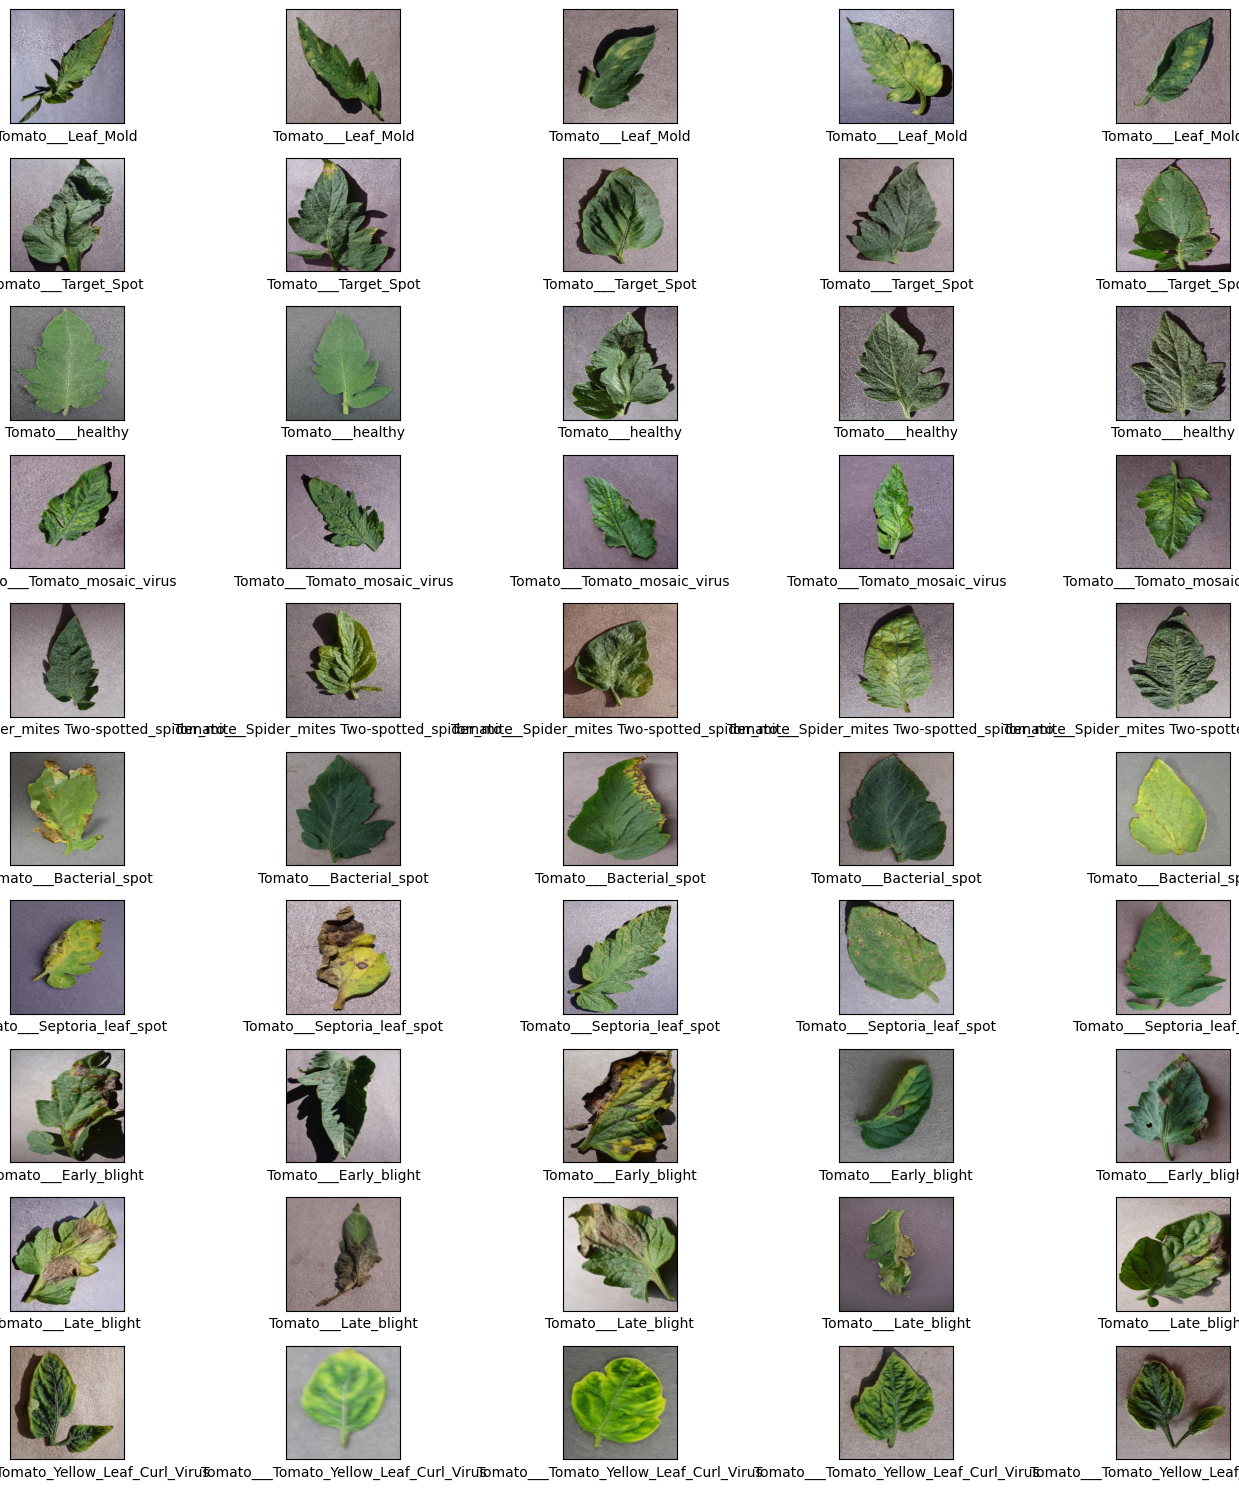

In [8]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
tomato_leaf_image = {}

# Menentukan path sumber train
path = "tomato/"
path_sub = os.path.join(path, "dataset")
for i in os.listdir(path_sub):
    tomato_leaf_image[i] = os.listdir(os.path.join(path_sub, i))

# Menampilkan 5 gambar secara acak
path_sub = "tomato/dataset/"

fig, axs = plt.subplots(len(tomato_leaf_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(path_sub)):
    images = np.random.choice(tomato_leaf_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])


fig.tight_layout()

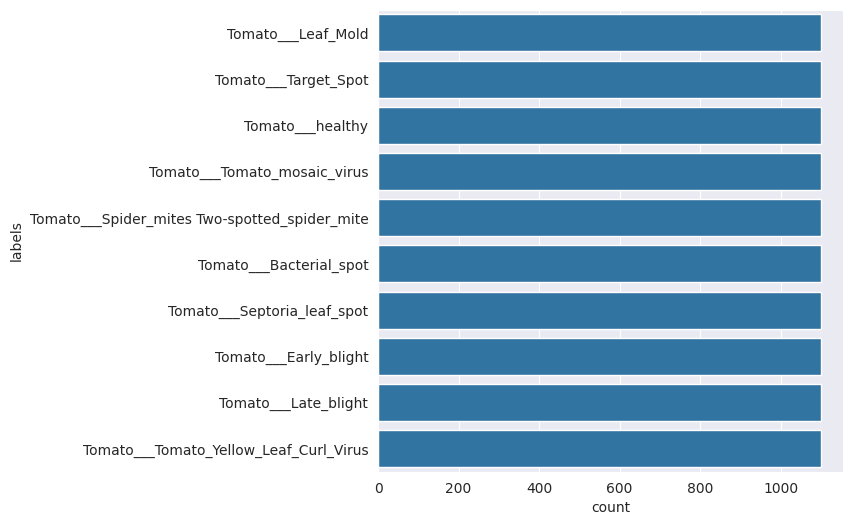

In [9]:
# Definisikan path sumber
tomato_leaf_path = "tomato/dataset/"

# Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path = []

# Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
for path, subdirs, files in os.walk(tomato_leaf_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

#### Split Dataset

In [10]:
# Panggil variabel mypath yang menampung folder dataset gambar
mypath= 'tomato/dataset/'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

# Memasukkan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapi
df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# Melihat jumlah data gambar pada masing-masing label
df.groupby(['labels']).size()

,0
labels,
Tomato___Bacterial_spot,1100
Tomato___Early_blight,1100
Tomato___Late_blight,1100
Tomato___Leaf_Mold,1100
Tomato___Septoria_leaf_spot,1100
Tomato___Spider_mites Two-spotted_spider_mite,1100
Tomato___Target_Spot,1100
Tomato___Tomato_Yellow_Leaf_Curl_Virus,1100
Tomato___Tomato_mosaic_virus,1100


In [11]:
# Variabel yang digunakan pada pemisahan data ini di mana variabel x = data path dan y = data labels

X= df['path']
y= df['labels']

# Split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=300)

In [12]:
# Menyatukan ke dalam masing-masing dataframe
df_tr = pd.DataFrame({'path':X_train,'labels':y_train,'set':'train'})
df_te = pd.DataFrame({'path':X_test,'labels':y_test,'set':'test'})

In [13]:
# Gabungkan DataFrame df_tr dan df_te
df_all = pd.concat([df_tr, df_te], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Cek sampel data
print(df_all.sample(5))

# Memanggil dataset asli yang berisi keseluruhan data gambar yang sesuai dengan labelnya
datasource_path = "tomato/dataset/"
# Membuat variabel Dataset, tempat menampung data yang telah dilakukan pembagian data training dan testing
dataset_path = "Dataset-Final/"


set    labels                                       
test   Tomato___Bacterial_spot                          227
       Tomato___Early_blight                            228
       Tomato___Late_blight                             221
       Tomato___Leaf_Mold                               246
       Tomato___Septoria_leaf_spot                      212
       Tomato___Spider_mites Two-spotted_spider_mite    232
       Tomato___Target_Spot                             199
       Tomato___Tomato_Yellow_Leaf_Curl_Virus           246
       Tomato___Tomato_mosaic_virus                     186
       Tomato___healthy                                 203
train  Tomato___Bacterial_spot                          873
       Tomato___Early_blight                            872
       Tomato___Late_blight                             879
       Tomato___Leaf_Mold                               854
       Tomato___Septoria_leaf_spot                      888
       Tomato___Spider_mites Two-spotted_spide

In [14]:
for index, row in tq(df_all.iterrows()):
    # Deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    # Buat direktori tujuan folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    # Tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    # Salin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

## Modelling

In [15]:
# Definisikan direktori training dan test
TRAIN_DIR = "Dataset-Final/train/"
TEST_DIR = "Dataset-Final/test/"

train_bacterial_spot = os.path.join(TRAIN_DIR + 'Tomato___Bacterial_spot')
train_early_blight = os.path.join(TRAIN_DIR + 'Tomato___Early_blight')
train_late_blight = os.path.join(TRAIN_DIR + 'Tomato___Late_blight')
train_leaf_mold = os.path.join(TRAIN_DIR + 'Tomato___Leaf_Mold')
train_septoria = os.path.join(TRAIN_DIR + 'Tomato___Septoria_leaf_spot')
train_spider_mites = os.path.join(TRAIN_DIR + 'Tomato___Spider_mites Two-spotted_spider_mite')
train_target_spot = os.path.join(TRAIN_DIR + 'Tomato___Target_Spot')
train_tomato_yellow_leaf_curl_virus = os.path.join(TRAIN_DIR + 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')
train_tomato_mosaic_virus = os.path.join(TRAIN_DIR + 'Tomato___Tomato_mosaic_virus')
train_healthy = os.path.join(TRAIN_DIR + 'Tomato___healthy')


test_bacterial_spot = os.path.join(TEST_DIR + '/Tomato___Bacterial_spot')
test_early_blight = os.path.join(TEST_DIR + 'Tomato___Early_blight')
test_late_blight = os.path.join(TEST_DIR + 'Tomato___Late_blight')
test_leaf_mold = os.path.join(TEST_DIR + 'Tomato___Leaf_Mold')
test_septoria = os.path.join(TEST_DIR + 'Tomato___Septoria_leaf_spot')
test_spider_mites = os.path.join(TEST_DIR + 'Tomato___Spider_mites Two-spotted_spider_mite')
test_target_spot = os.path.join(TEST_DIR + 'Tomato___Target_Spot')
test_tomato_yellow_leaf_curl_virus = os.path.join(TEST_DIR + 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')
test_tomato_mosaic_virus = os.path.join(TEST_DIR + 'Tomato___Tomato_mosaic_virus')
test_healthy = os.path.join(TEST_DIR + 'Tomato___healthy')

# Tampilkan isi dari direktorinya
print("Training Set")
print("Total number of tomato bacterial spot images in training set: ",len(os.listdir(train_bacterial_spot)))
print("Total number of tomato early blight images in training set: ",len(os.listdir(train_early_blight)))
print("Total number of tomato late blight images in training set: ",len(os.listdir(train_late_blight)))
print("Total number of tomato leaf mold images in training set: ",len(os.listdir(train_leaf_mold)))
print("Total number of tomato septoria images in training set: ",len(os.listdir(train_septoria)))
print("Total number of tomato spider mites images in training set: ",len(os.listdir(train_spider_mites)))
print("Total number of tomato target spot images in training set: ",len(os.listdir(train_target_spot)))
print("Total number of tomato yellow leaf curl virus images in training set: ",len(os.listdir(train_tomato_yellow_leaf_curl_virus)))
print("Total number of tomato mosaic virus images in training set: ",len(os.listdir(train_tomato_mosaic_virus)))
print("Total number of tomato healthy images in training set: ",len(os.listdir(train_healthy)))
print("====================================================================================================")
print("Test Set")
print("Total number of tomato bacterial spot images in test set: ",len(os.listdir(test_bacterial_spot)))
print("Total number of tomato early blight images in test set: ",len(os.listdir(test_early_blight)))
print("Total number of tomato late blight images in test set: ",len(os.listdir(test_late_blight)))
print("Total number of tomato leaf mold images in test set: ",len(os.listdir(test_leaf_mold)))
print("Total number of tomato septoria images in test set: ",len(os.listdir(test_septoria)))
print("Total number of tomato spider mites images in test set: ",len(os.listdir(test_spider_mites)))
print("Total number of tomato target spot images in test set: ",len(os.listdir(test_target_spot)))
print("Total number of tomato yellow leaf curl virus images in test set: ",len(os.listdir(test_tomato_yellow_leaf_curl_virus)))
print("Total number of tomato mosaic virus images in test set: ",len(os.listdir(test_tomato_mosaic_virus)))
print("Total number of tomato healthy images in test set: ",len(os.listdir(test_healthy)))


Training Set
Total number of tomato bacterial spot images in training set:  873
Total number of tomato early blight images in training set:  872
Total number of tomato late blight images in training set:  879
Total number of tomato leaf mold images in training set:  854
Total number of tomato septoria images in training set:  888
Total number of tomato spider mites images in training set:  868
Total number of tomato target spot images in training set:  901
Total number of tomato yellow leaf curl virus images in training set:  854
Total number of tomato mosaic virus images in training set:  914
Total number of tomato healthy images in training set:  897
Test Set
Total number of tomato bacterial spot images in test set:  227
Total number of tomato early blight images in test set:  228
Total number of tomato late blight images in test set:  221
Total number of tomato leaf mold images in test set:  246
Total number of tomato septoria images in test set:  212
Total number of tomato spider m

In [16]:
# Membuat objek ImageDataGenerator yang menormalkan gambar
datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(TRAIN_DIR,
                                              batch_size=32,
                                              target_size=(150,150),
                                              color_mode="rgb",
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True)

# validation_generator = datagen.flow_from_directory(TRAIN_DIR,
#                                                    batch_size=32,
#                                                    target_size=(150,150),
#                                                    color_mode="rgb",
#                                                    class_mode='categorical',
#                                                    subset='validation',
#                                                    shuffle=False)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  batch_size=1,
                                                  target_size=(150,150),
                                                  color_mode="rgb",
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 8800 images belonging to 10 classes.
Found 2200 images belonging to 10 classes.


## Evaluasi dan Visualisasi

# **Model Exp 1 - CNN Architecture (Using 32 Neurons in Conv Layer):**

In [17]:
# Hapus sesi sebelumnya dari Keras backend untuk memulai model baru
tf.keras.backend.clear_session()

# Inisiasi Sequential
model_1 = Sequential()

# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150, 3)))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (4, 4),padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# Flatten layer
model_1.add(Flatten())
# 1nd Dense Layer
model_1.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_1.add(Dropout(0.5))
# 2nd Dense Layer
model_1.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_1.add(Dropout(0.3))

# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_1.add(Dense(10, activation='softmax'))

# Compile Model
model_1.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Summary of the Model Architecture
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 150, 150, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        16416     
                                                                 
 batch_normalization_1 (Bat  (None, 75, 75, 32)        128       
 chNormalization)                                                
                                                        

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Hitung berat kelas
count_bacterial_spot = len(os.listdir(train_bacterial_spot))
count_early_blight = len(os.listdir(train_early_blight))
count_late_blight = len(os.listdir(train_late_blight))
count_leaf_mold = len(os.listdir(train_leaf_mold))
count_septoria = len(os.listdir(train_septoria))
count_spider_mites = len(os.listdir(train_spider_mites))
count_target_spot = len(os.listdir(train_target_spot))
count_tomato_yellow_leaf_curl_virus = len(os.listdir(train_tomato_yellow_leaf_curl_virus))
count_tomato_mosaic_virus = len(os.listdir(train_tomato_mosaic_virus))
count_healthy = len(os.listdir(train_healthy))

# Hitung bobot kelas
total_samples = (count_bacterial_spot + count_early_blight + count_late_blight +
                 count_leaf_mold + count_septoria + count_spider_mites +
                 count_target_spot + count_tomato_yellow_leaf_curl_virus +
                 count_tomato_mosaic_virus + count_healthy)
class_weights = {
    0: (1 / count_bacterial_spot) * total_samples / 10.0,
    1: (1 / count_early_blight) * total_samples / 10.0,
    2: (1 / count_late_blight) * total_samples / 10.0,
    3: (1 / count_leaf_mold) * total_samples / 10.0,
    4: (1 / count_septoria) * total_samples / 10.0,
    5: (1 / count_spider_mites) * total_samples / 10.0,
    6: (1 / count_target_spot) * total_samples / 10.0,
    7: (1 / count_tomato_yellow_leaf_curl_virus) * total_samples / 10.0,
    8: (1 / count_tomato_mosaic_virus) * total_samples / 10.0,
    9: (1 / count_healthy) * total_samples / 10.0
}

# membuat callback
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch+1}: Accuracy: {logs["accuracy"]}, Validation Accuracy: {logs["val_accuracy"]}')

# Fitting / training model dengan callbacks
history_1 = model_1.fit(
    train_generator,
    epochs=35,
    batch_size=45,
    validation_data=test_generator,
    class_weight=class_weights,
    callbacks=[model_checkpoint, CustomCallback()],
    verbose=1
)


Epoch 1/35
275/275 [==============================] - 30s 109ms/step - loss: 0.0462 - accuracy: 0.9323 - val_loss: 0.0907 - val_accuracy: 0.9268
Epoch 2/35
275/275 [==============================] - 24s 88ms/step - loss: 0.0503 - accuracy: 0.9286 - val_loss: 0.1641 - val_accuracy: 0.8736
Epoch 3/35
275/275 [==============================] - 21s 77ms/step - loss: 0.0482 - accuracy: 0.9283 - val_loss: 0.1361 - val_accuracy: 0.8809
Epoch 4/35
275/275 [==============================] - 22s 79ms/step - loss: 0.0470 - accuracy: 0.9281 - val_loss: 0.1447 - val_accuracy: 0.9127
Epoch 5/35
275/275 [==============================] - 22s 79ms/step - loss: 0.0464 - accuracy: 0.9312 - val_loss: 0.3130 - val_accuracy: 0.7923
Epoch 6/35
275/275 [==============================] - 24s 87ms/step - loss: 0.0424 - accuracy: 0.9370 - val_loss: 0.4501 - val_accuracy: 0.7745
Epoch 7/35
275/275 [==============================] - 21s 78ms/step - loss: 0.0430 - accuracy: 0.9309 - val_loss: 0.1790 - val_accuracy

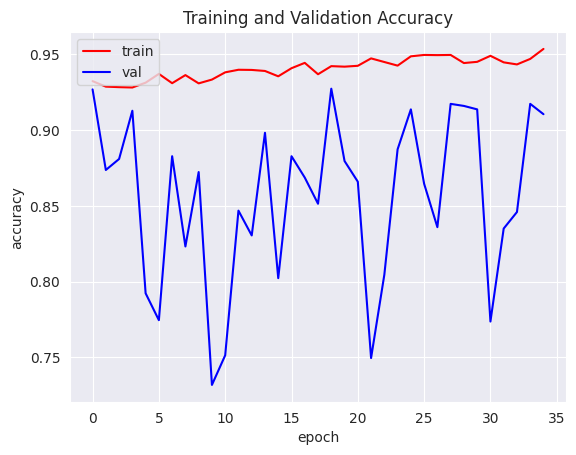

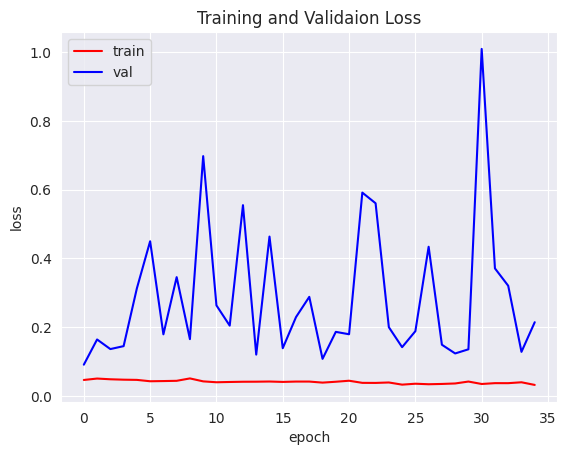

In [28]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()



                               precision    recall  f1-score   support

               Bacterial Spot     0.8266    0.9868    0.8996       227
                 Early Blight     0.9404    0.6228    0.7493       228
                  Late Blight     0.8502    0.9502    0.8974       221
                    Leaf Mold     0.9283    0.9472    0.9376       246
                     Septoria     0.9423    0.9245    0.9333       212
                 Spider Mites     0.9614    0.8578    0.9066       232
                  Target Spot     0.7619    0.9648    0.8514       199
Tomato Yellow Leaf Curl Virus     0.9913    0.9309    0.9602       246
          Tomato Mosaic Virus     0.9887    0.9409    0.9642       186
                      Healthy     0.9902    1.0000    0.9951       203

                     accuracy                         0.9105      2200
                    macro avg     0.9181    0.9126    0.9095      2200
                 weighted avg     0.9189    0.9105    0.9087      2200



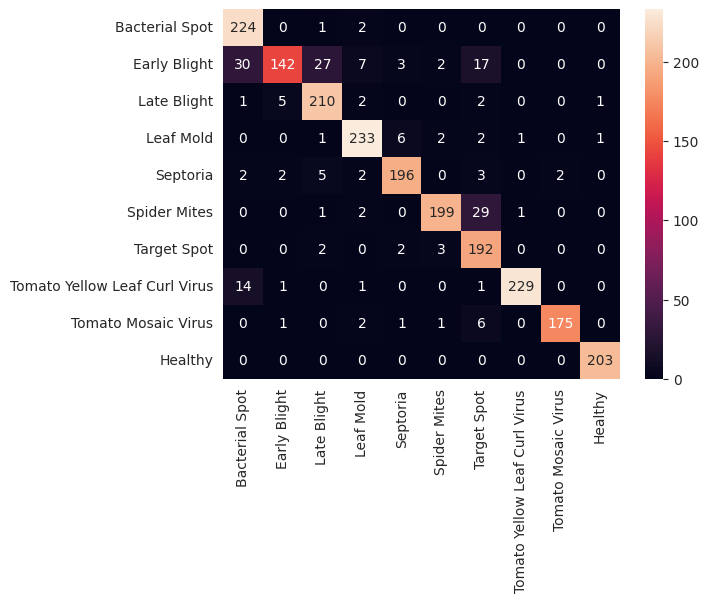

In [29]:
y_true = test_generator.classes

# Prediksi probabilitas
preds_probs = model_1.predict(test_generator,verbose=0)

# Mendapatkan prediksi probabilitas
preds_1 = np.argmax(preds_probs, axis=1)

# Print Confusion Matrix
cm = pd.DataFrame(data=confusion_matrix(y_true, preds_1),
                  index=["Bacterial Spot", "Early Blight", "Late Blight", "Leaf Mold", "Septoria", "Spider Mites", "Target Spot", "Tomato Yellow Leaf Curl Virus", "Tomato Mosaic Virus", "Healthy"],
                  columns=["Bacterial Spot", "Early Blight", "Late Blight", "Leaf Mold", "Septoria", "Spider Mites", "Target Spot", "Tomato Yellow Leaf Curl Virus", "Tomato Mosaic Virus", "Healthy"])
sns.heatmap(cm,annot=True,fmt="d")

# Print Classification Report
print("\n")
print(classification_report(y_true=y_true, y_pred=preds_1,
                            target_names =['Bacterial Spot', 'Early Blight', "Late Blight", "Leaf Mold", "Septoria", "Spider Mites", "Target Spot", "Tomato Yellow Leaf Curl Virus", "Tomato Mosaic Virus", "Healthy"],
                            digits=4))

## Konversi Model

**Save Model**

In [30]:
save_path = 'saved_model/'
tf.saved_model.save(model_1, save_path)

**TF Lite**

In [31]:
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()

os.makedirs('tflite', exist_ok=True)

tflite_model_path = os.path.join('tflite', 'model.tflite')
with tf.io.gfile.GFile(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

label_file_path = os.path.join('tflite', 'label.txt')
with open(label_file_path, 'w') as f:
    f.write("Label content goes here")

**TF JS**

In [32]:
!pip install tensorflowjs

  Using cached tensorflowjs-4.20.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached tensorflow_decision_forests-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
  Using cached tf_keras-2.16.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflowjs-4.20.0-py3-none-any.whl (89 kB)
Using cached tensorflow_decision_forests-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.5 MB)
Using cached tf_keras-2.16.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-2.17.0:
      Successfully uninstalled tf_keras-2.17.0


In [33]:
saved_model_dir = 'saved_model'
output_dir = '/content/tfjs_model'

os.makedirs(output_dir, exist_ok=True)

!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    {saved_model_dir} \
    {output_dir}

2024-08-21 00:52:16.671865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 00:52:16.733143: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 00:52:16.733240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 00:52:26.417626: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-08-21 00:52:32.309246: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


## Inference (Optional)

Saving late.JPG to late.JPG


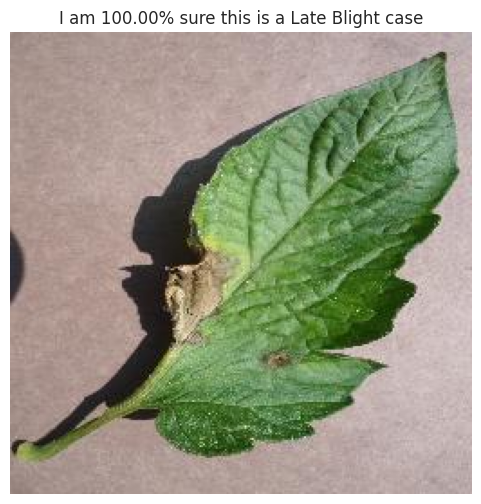

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
from PIL import Image
import io

# 1. Upload gambar
uploaded = files.upload()

# Ambil nama file gambar yang di-upload
image_path = list(uploaded.keys())[0]

# 2. Muat model TF-Lite
interpreter = tf.lite.Interpreter(model_path="tflite/model.tflite")
interpreter.allocate_tensors()

# Mendapatkan detail input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 3. Load gambar dan preprocess
def preprocess_image(image_path, target_size=(150, 150)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    img_array = np.array(img).astype(np.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Preprocess gambar yang di-upload
pp_test_img = preprocess_image(image_path)

# 4. Masukkan gambar ke input tensor
interpreter.set_tensor(input_details[0]['index'], pp_test_img)

# Jalankan inference
interpreter.invoke()

# Ambil hasil prediksi dari output tensor
test_preds = interpreter.get_tensor(output_details[0]['index'])

# Menampilkan hasil prediksi
class_names = ['Bacterial Spot', 'Early Blight', 'Late Blight', 'Leaf Mold',
               'Septoria Leaf Spot', 'Spider Mites', 'Target Spot',
               'Tomato Yellow Leaf Curl Virus', 'Tomato Mosaic Virus', 'Healthy']

predicted_class = np.argmax(test_preds)
predicted_label = class_names[predicted_class]
predicted_probability = test_preds[0][predicted_class] * 100

# Menampilkan gambar dan prediksi
img = Image.open(image_path)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.title(f"I am {predicted_probability:.2f}% sure this is a {predicted_label} case")
plt.show()


In [36]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 kB 20.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 4.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=2e5ae3363d59b53570c76c15d8595fb08dec05480d7b721419131f3a3fd54eca
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
  Attempting uninstall: mistune
    Found existing installation: mistune 0.8.4
    Uninstalling mistune-0.8.4:
      Successfully uninstalled mistune-0.8.4
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.makedirs('/content/drive/MyDrive/Colab Notebooks/Submission Klasifikasi Gambar', exist_ok=True)

In [3]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/Submission Klasifikasi Gambar" --scan-notebooks --force

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Colab Notebooks/Submission Klasifikasi Gambar/requirements.txt


In [4]:
import shutil
from google.colab import files

# Kompres folder tfjs_model menjadi ZIP
shutil.make_archive('/content/tfjs_model', 'zip', '/content/tfjs_model')

# Download file ZIP
files.download('/content/tfjs_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Kompres folder saved_model menjadi ZIP
shutil.make_archive('/content/saved_model', 'zip', '/content/saved_model')

# Download file ZIP
files.download('/content/saved_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Kompres folder tflite menjadi ZIP
shutil.make_archive('/content/tflite', 'zip', '/content/tflite')

# Download file ZIP
files.download('/content/tflite.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>